Erste 5 Zeilen:
   anr       datum                                       titel_kurz_d  \
0  1.0  12.09.1848  Bundesverfassung der schweizerischen Eidgenoss...   
1  2.0  14.01.1866                                   Mass und Gewicht   
2  3.0  14.01.1866  Gleichstellung der Juden und Naturalisierten m...   
3  4.0  14.01.1866  Stimmrecht der Niedergelassenen in Gemeindeang...   
4  5.0  14.01.1866  Besteuerung und zivilrechtliche Verhältnisse d...   

                                        titel_kurz_f  \
0   Constitution fédérale de la Confédération suisse   
1                                   Poids et mesures   
2                                  Egalité des Juifs   
3  Droit de vote des Suisses établis, en matière ...   
4      Impôts et rapports civils des Suisses établis   

                                        titel_kurz_e  \
0    Federal Constitution of the Swiss Confederation   
1                               Weights and measures   
2  Equal rights for Jews and naturalised

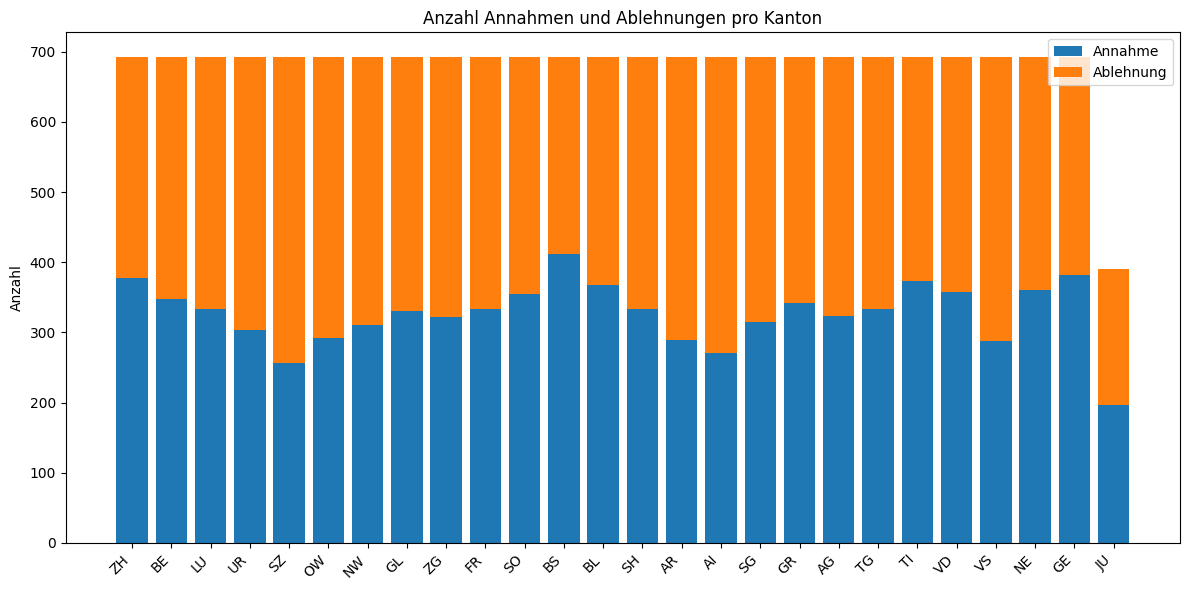

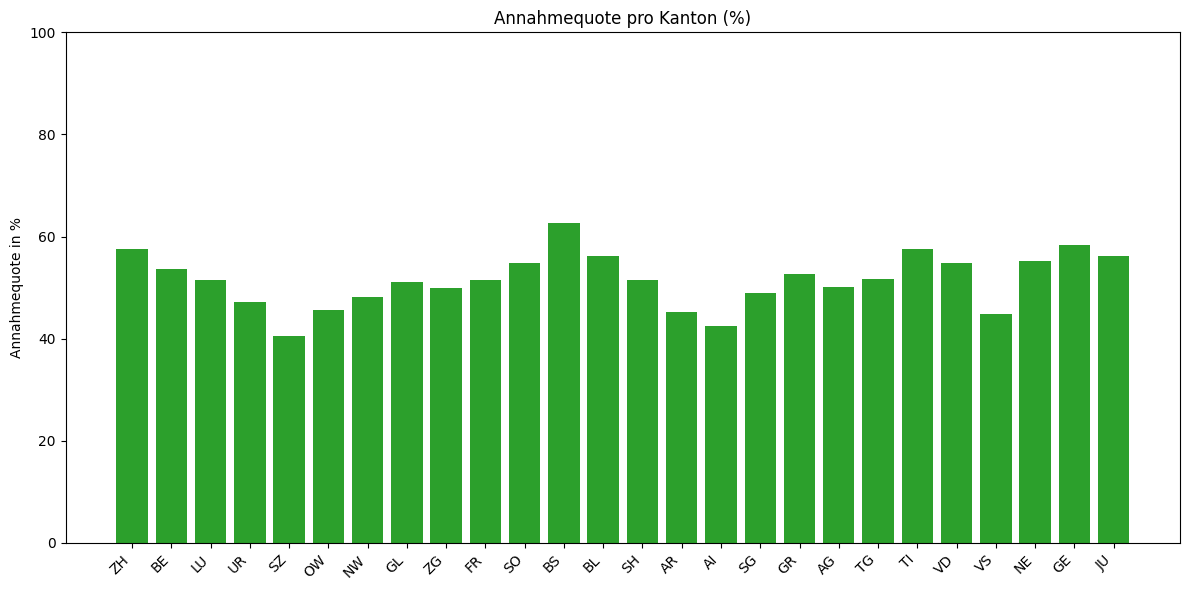

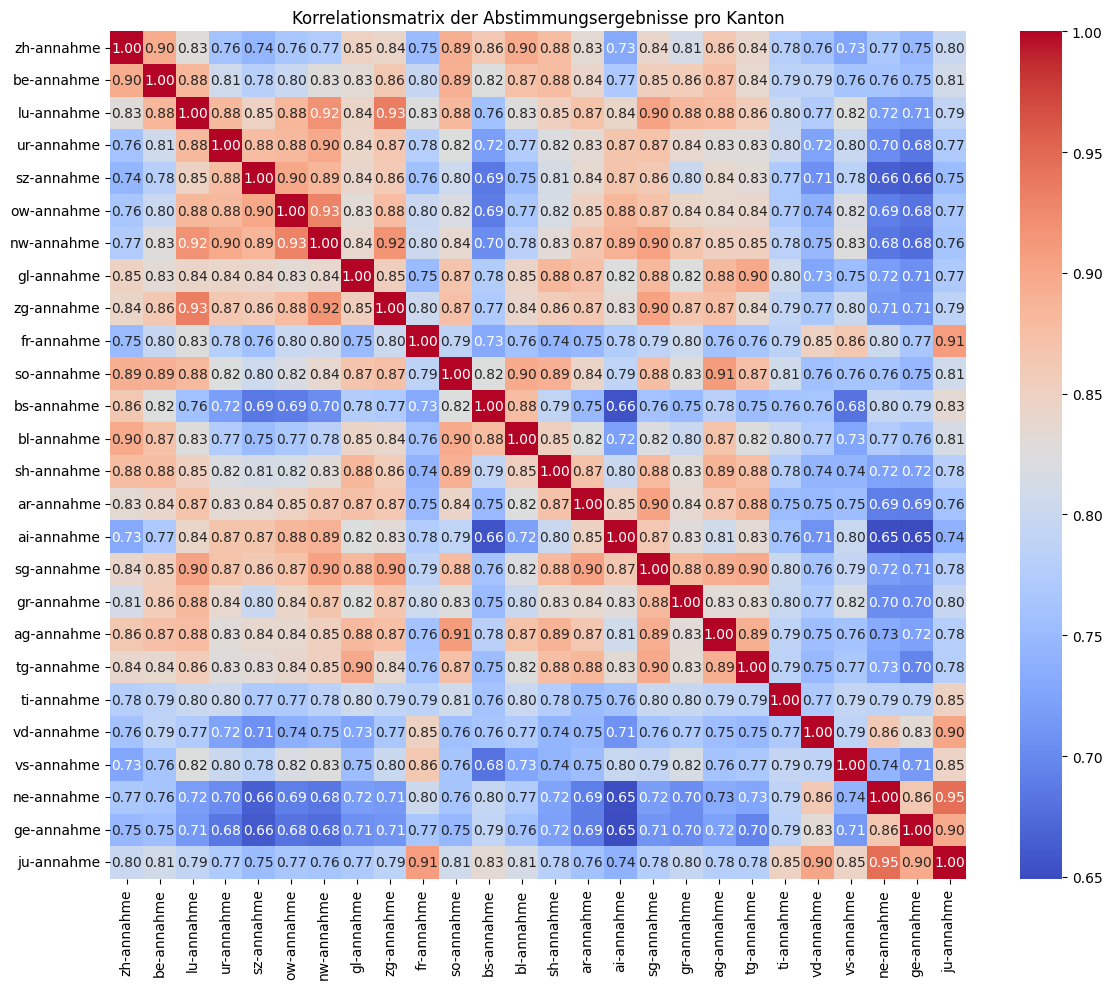

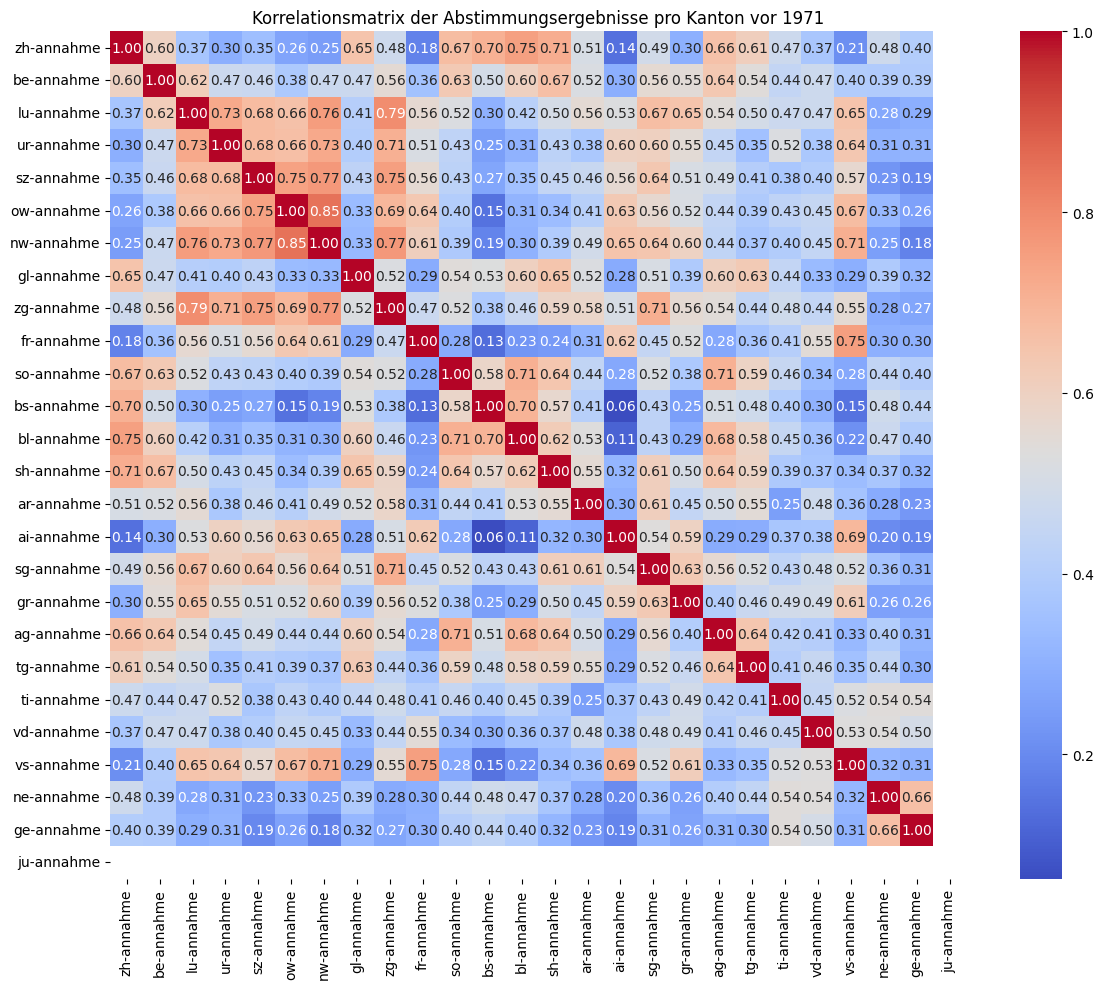

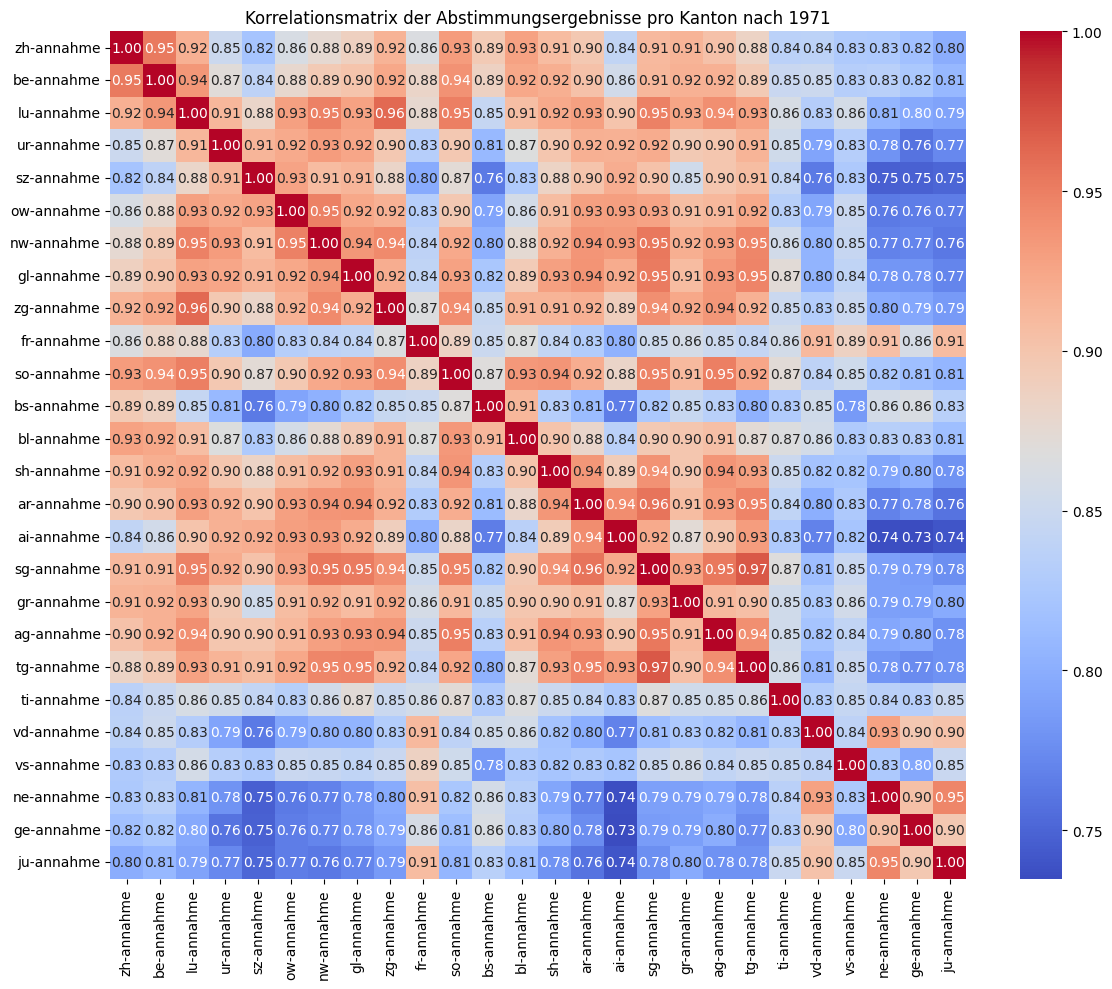

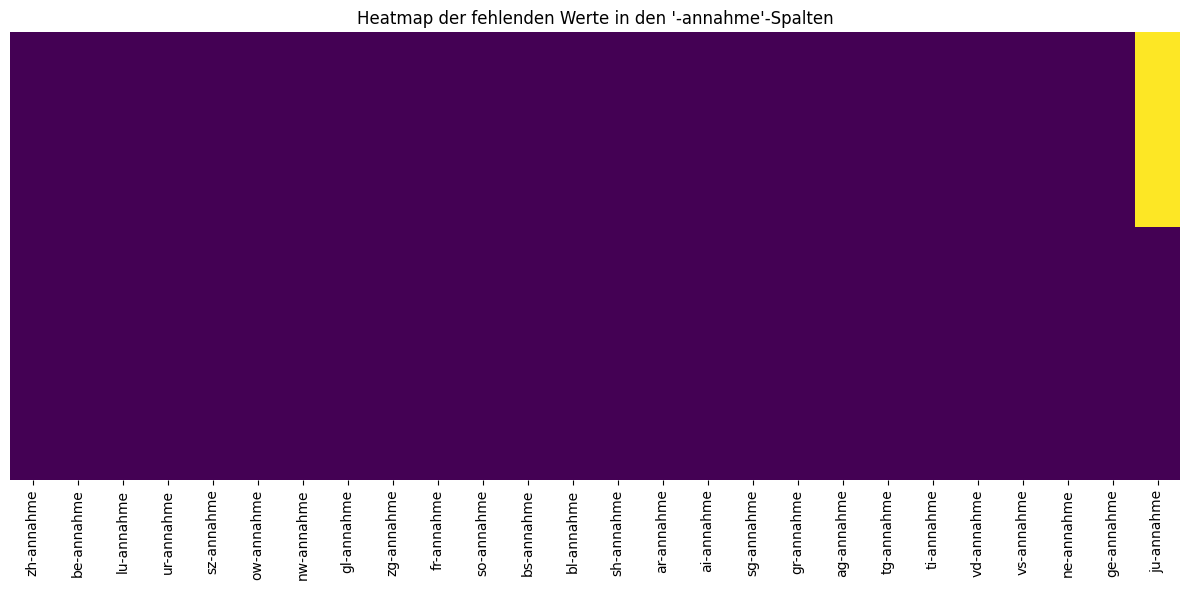

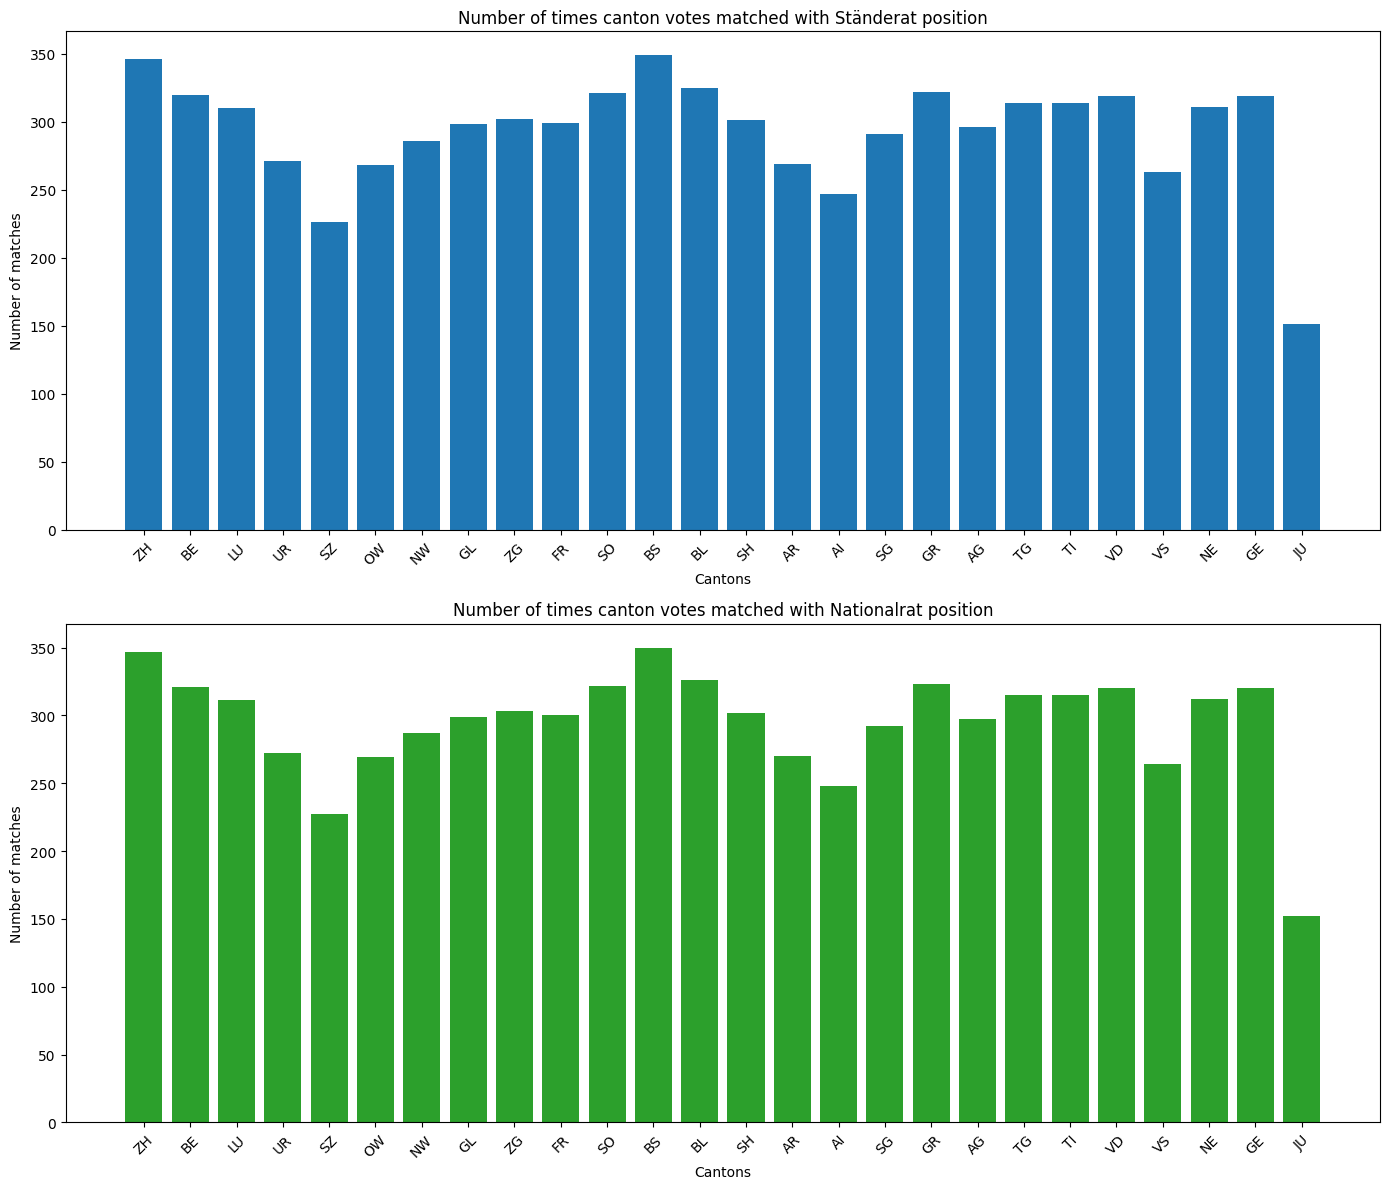

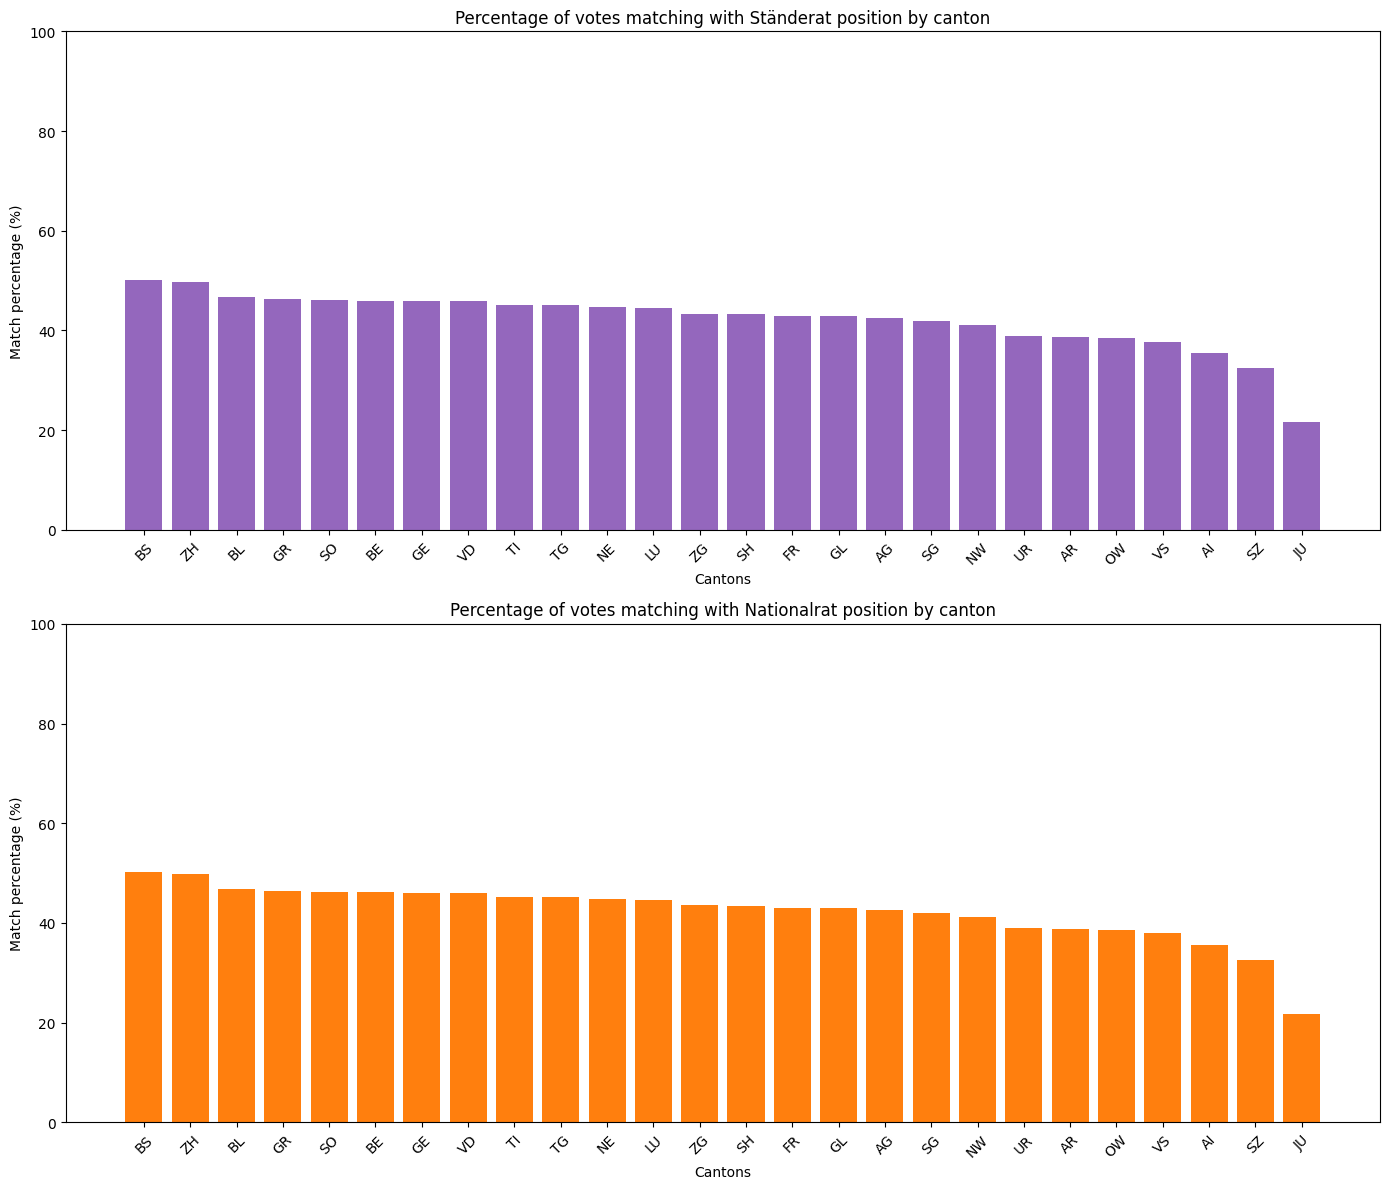

In [ ]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# -------------------------------
# 1. Daten einlesen und erste Analyse
# -------------------------------
# CSV-Datei einlesen – wir verwenden Semikolon als Trennzeichen und UTF-8 Kodierung
df = pd.read_csv('Data/dataset.csv', delimiter=";", encoding="utf-8")

# Erste Zeilen des Datensatzes anzeigen, um einen Überblick zu bekommen
print("Erste 5 Zeilen:")
print(df.head())
# Strukturinformationen des DataFrames ausgeben (Spaltentypen, fehlende Werte, etc.)
print("\nInfo zum DataFrame:")
df.info()
# Deskriptive Statistik berechnen (Mittelwert, Standardabweichung, Min/Max, etc.)
print("\nDeskriptive Statistik:")
print(df.describe())

# -------------------------------
# 2. Filtern und Bereinigen der Daten
# -------------------------------
# Selektiere nur die Spalten, die "-annahme" enthalten (Abstimmungsergebnisse pro Kanton)
df_filtered = df[[col for col in df.columns if '-annahme' in col]]

# Problematische Werte ersetzen:
# - '.' und 'z' werden als fehlende Werte (NaN) interpretiert
# - '1' bedeutet Annahme der Vorlage
# - '0' bedeutet Ablehnung der Vorlage
df_filtered = df_filtered.replace({'.': np.nan, 'z': np.nan, '1': 1, '0': 0})
# Alle Werte in numerisches Format umwandeln; nicht-konvertierbare werden zu NaN
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

# -------------------------------
# 3. Visualisierungen: Gestapeltes Balkendiagramm
# -------------------------------
# Berechnung der Anzahl Annahmen und Ablehnungen pro Kanton
acceptance_counts = (df_filtered == 1).sum()  # Summe aller Annahmen
rejected_counts = (df_filtered == 0).sum()    # Summe aller Ablehnungen

# Formatiere die Kantonsnamen für die Visualisierung
# Ersetze "-annahme" und wandle in Großbuchstaben um (z.B. "zh-annahme" wird zu "ZH")
canton_names = acceptance_counts.index.str.replace("-annahme", "", regex=False).str.upper()

# Erstelle ein gestapeltes Balkendiagramm für Annahmen und Ablehnungen pro Kanton
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(canton_names, acceptance_counts.values, label='Annahme', color='tab:blue')
ax.bar(canton_names, rejected_counts.values, bottom=acceptance_counts.values, label='Ablehnung', color='tab:orange')

plt.xticks(rotation=45, ha='right')  # Drehe Beschriftungen für bessere Lesbarkeit
plt.title('Anzahl Annahmen und Ablehnungen pro Kanton')
plt.ylabel('Anzahl')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 4. Erweiterte Analyse: Annahmequote pro Kanton
# -------------------------------
# Berechne die durchschnittliche Annahmequote pro Kanton
# Da die Werte 0 und 1 sind, gibt der Mittelwert direkt den Anteil der Annahmen an
acceptance_rate = df_filtered.mean()

# Visualisierung der Annahmequote als Prozentsatz in einem Balkendiagramm
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(canton_names, acceptance_rate.values * 100, color='tab:green')  # Umrechnung in Prozent
plt.xticks(rotation=45, ha='right')
plt.title('Annahmequote pro Kanton (%)')
plt.ylabel('Annahmequote in %')
plt.ylim(0, 100)  # Y-Achse von 0 bis 100%
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Erweiterte Analyse: Korrelationsmatrix zwischen Kantonen
# -------------------------------
# Berechne Korrelationen zwischen Kantonen, um zu sehen, ob sie ähnlich abstimmen
# Positive Korrelation bedeutet, dass Kantone tendenziell ähnlich abstimmen
corr_matrix = df_filtered.corr()

# Visualisierung der Korrelationsmatrix als Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix der Abstimmungsergebnisse pro Kanton")
plt.tight_layout()
plt.show()

# Definiere das Datum für die Einführung des Frauenstimmrechts in der Schweiz
init_date = datetime(1971, 2, 7, 0, 0)

# Teile die Daten in Abstimmungen vor und nach der Einführung des Frauenstimmrechts
# Abstimmungen vor 1971 (ohne Frauenstimmrecht)
df_without_women = df_filtered.loc[pd.to_datetime(df['datum'], format='%d.%m.%Y') < init_date]
df_without_women.reset_index(drop=True, inplace=True)

# Berechne und visualisiere die Korrelationsmatrix für Abstimmungen vor 1971
corr_matrix = df_without_women.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix der Abstimmungsergebnisse pro Kanton vor 1971")
plt.tight_layout()
plt.show()

# Abstimmungen nach 1971 (mit Frauenstimmrecht)
df_with_women = df_filtered.loc[pd.to_datetime(df['datum'], format='%d.%m.%Y') > init_date]
df_with_women.reset_index(drop=True, inplace=True)

# Berechne und visualisiere die Korrelationsmatrix für Abstimmungen nach 1971
corr_matrix = df_with_women.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix der Abstimmungsergebnisse pro Kanton nach 1971")
plt.tight_layout()
plt.show()

# -------------------------------
# 6. Erweiterte Analyse: Missing-Values-Heatmap
# -------------------------------
# Visualisiere fehlende Werte in den Abstimmungsdaten pro Kanton
plt.figure(figsize=(12, 6))
sns.heatmap(df_filtered.isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Heatmap der fehlenden Werte in den '-annahme'-Spalten")
plt.tight_layout()
plt.show()

# -------------------------------
# 7. Analyse der Übereinstimmung zwischen Kantonsstimmen und den Positionen von Ständerat und Nationalrat
# -------------------------------

# Bereite die Spalten 'sr-pos' (Ständerat) und 'nr-pos' (Nationalrat) auf
# Wandle problematische Werte um und konvertiere in numerisches Format
df['sr-pos'] = df['sr-pos'].replace({'.': np.nan, 'z': np.nan, '1': 1, '0': 0})
df['nr-pos'] = df['nr-pos'].replace({'.': np.nan, 'z': np.nan, '1': 1, '0': 0})
df['sr-pos'] = pd.to_numeric(df['sr-pos'], errors='coerce')
df['nr-pos'] = pd.to_numeric(df['nr-pos'], errors='coerce')

# Selektiere alle Kantonsspalten für die Analyse
canton_columns = [col for col in df.columns if '-annahme' in col]

# Erstelle leere DataFrames zur Speicherung der Übereinstimmungen
sr_matches = pd.DataFrame(index=df.index)
nr_matches = pd.DataFrame(index=df.index)

# Vergleiche für jeden Kanton, ob dessen Abstimmung mit der Position von Ständerat und Nationalrat übereinstimmt
for canton in canton_columns:
    # Konvertiere die Kantonsstimme in numerisches Format
    canton_vote = pd.to_numeric(df[canton].replace({'.': np.nan, 'z': np.nan, '1': 1, '0': 0}), errors='coerce')
    
    # Prüfe auf Übereinstimmung (True wenn die Stimme mit der Position übereinstimmt)
    sr_matches[canton] = (canton_vote == df['sr-pos'])
    nr_matches[canton] = (canton_vote == df['nr-pos'])

# Berechne die Anzahl der Übereinstimmungen pro Kanton
sr_match_counts = sr_matches.sum(axis=0)
nr_match_counts = nr_matches.sum(axis=0)

# Extrahiere die Kantonsnamen für die Darstellung
canton_names = [col.replace('-annahme', '').upper() for col in canton_columns]

# Erstelle Diagramme für die absolute Anzahl der Übereinstimmungen
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Diagramm für Übereinstimmungen mit dem Ständerat
ax1.bar(canton_names, sr_match_counts.values, color='tab:blue')
ax1.set_title('Anzahl der Übereinstimmungen zwischen Kantonsstimmen und Ständerat-Position')
ax1.set_ylabel('Anzahl Übereinstimmungen')
ax1.set_xlabel('Kantone')
ax1.tick_params(axis='x', rotation=45)

# Diagramm für Übereinstimmungen mit dem Nationalrat
ax2.bar(canton_names, nr_match_counts.values, color='tab:green')
ax2.set_title('Anzahl der Übereinstimmungen zwischen Kantonsstimmen und Nationalrat-Position')
ax2.set_ylabel('Anzahl Übereinstimmungen')
ax2.set_xlabel('Kantone')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Berechne den prozentualen Anteil der Übereinstimmungen
total_valid_votes = (~df['sr-pos'].isna()).sum()  # Anzahl gültiger Abstimmungen
sr_match_percentages = (sr_match_counts / total_valid_votes * 100).sort_values(ascending=False)  # Prozentsatz und absteigende Sortierung
nr_match_percentages = (nr_match_counts / total_valid_votes * 100).sort_values(ascending=False)  # Prozentsatz und absteigende Sortierung

# Erstelle Diagramme für die prozentualen Übereinstimmungen
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Diagramm für prozentuale Übereinstimmungen mit dem Ständerat
ax1.bar(sr_match_percentages.index.str.replace('-annahme', '').str.upper(), 
        sr_match_percentages.values, color='tab:purple')
ax1.set_title('Prozentuale Übereinstimmung der Kantonsstimmen mit der Ständerat-Position')
ax1.set_ylabel('Übereinstimmung (%)')
ax1.set_xlabel('Kantone')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 100)  # Y-Achse von 0 bis 100%

# Diagramm für prozentuale Übereinstimmungen mit dem Nationalrat
ax2.bar(nr_match_percentages.index.str.replace('-annahme', '').str.upper(), 
        nr_match_percentages.values, color='tab:orange')
ax2.set_title('Prozentuale Übereinstimmung der Kantonsstimmen mit der Nationalrat-Position')
ax2.set_ylabel('Übereinstimmung (%)')
ax2.set_xlabel('Kantone')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 100)  # Y-Achse von 0 bis 100%

plt.tight_layout()
plt.show()